<a href="https://colab.research.google.com/github/Riyanadi120802/SC_GIT_Collaboration/blob/master/Tugas_5_Startup_Campus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Package


In [31]:
import cv2 as cv
from skimage import io
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import sklearn

## Memasukkan images dari url

In [32]:
img_url = ("https://media.istockphoto.com/photos/coins-collection-isolated-on-white-picture-id147063335?k=20&m=147063335&s=612x612&w=0&h=KLZ8GF9AjbjoK4OXTcZjnZDogT-hV6Hr7atjczfFhTI=")

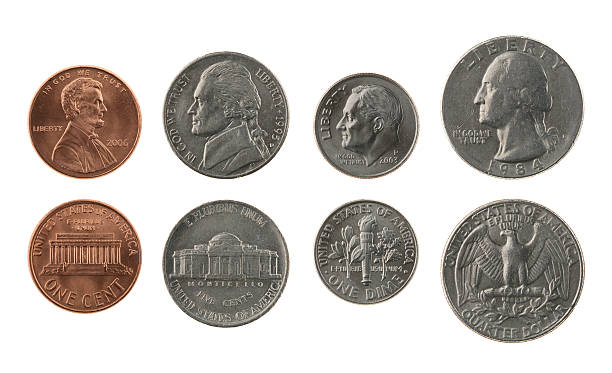

In [33]:
image_bgr = io.imread(img_url)
image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)
cv2_imshow(image_rgb)

####Convert the image to a grayscale image

In [34]:
gambar_abu = cv.cvtColor(image_rgb, cv.COLOR_RGB2GRAY)

####Show the histogram of the grayscale image

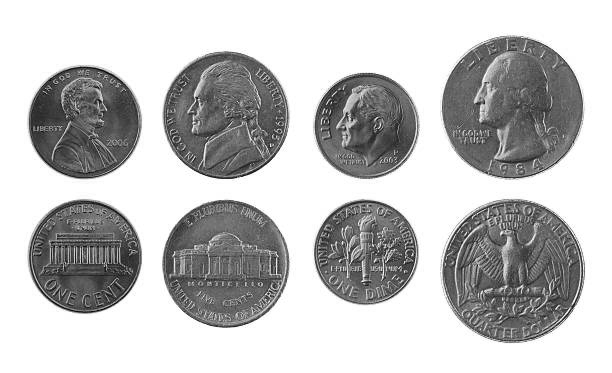

In [35]:
cv2_imshow(gambar_abu)

####Show the histogram of the grayscale image

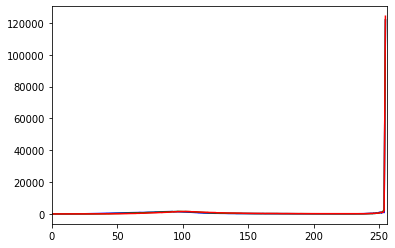

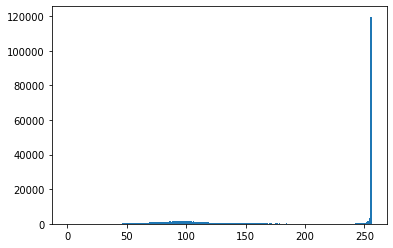

In [36]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image_rgb],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()
plt.hist(gambar_abu.ravel(),bins = 256, range = [0,256]) 
plt.show()

####Find a good threshold value to classify the image pixels into foreground/coins and background (Hint: use the OpenCV function

In [37]:
ret, img_treshold = cv.threshold(gambar_abu, 225, 255, cv.THRESH_BINARY)
print(f"Threshold: {ret}")

Threshold: 225.0


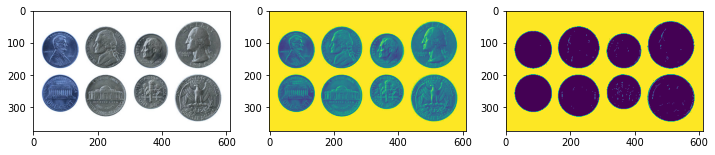

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))
ax[0].imshow(image_rgb)
ax[1].imshow(gambar_abu)
ax[2].imshow(img_treshold)

####Show the final result of the binary image (WHITE color for coins and BLACK color for background. Hint: If necessary, use the OpenCV function

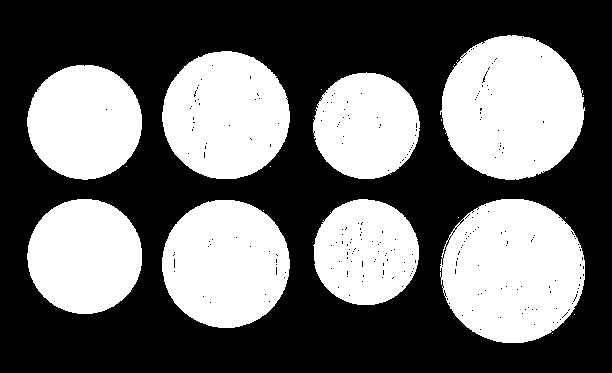

-1

In [39]:
img_bitwiseNot = cv.bitwise_not(img_treshold)
cv2_imshow(img_bitwiseNot)
cv.waitKey(0)

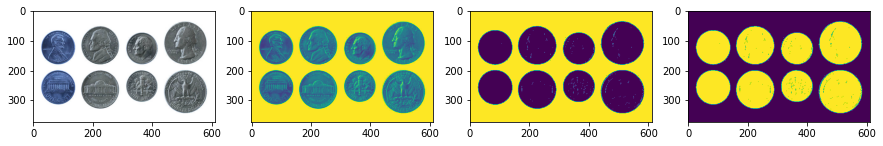

In [40]:
fig, ax = plt.subplots(1, 4, figsize=(15, 10))
ax[0].imshow(image_rgb)
ax[1].imshow(gambar_abu)
ax[2].imshow(img_treshold)
ax[3].imshow(img_bitwiseNot)

TypeError: ignored

In [56]:
img

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [46]:
X_test = [['image_rgb', 'gambar_abu', 'img_treshold', 'img_bitwiseNot']]
y_test = ['koin', 'tidak_Koin']

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def evaluasi_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,


ValueError: ignored